In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from narwhals.selectors import categorical
from seaborn import barplot

# Описание проектной задачи

Необходимо научиться по результатам опроса, который авиакомпания проводит после полёта, предсказывать удовлетворённость пассажиров услугами авиакомпании и совершённым перелётом.

После перелёта пассажир заполнял анкету, которая состоит из различных вопросов про условия на борту самолёта и качество предоставленных услуг. Последний вопрос в анкете был сформулирован таким образом: оцените свою удовлетворённость совершённым перелётом.

Задача состоит в том, чтобы на основе того, как пассажир отвечал на остальные вопросы анкеты, предсказать, остался он удовлетворён полётом или нет. Данная задача является классической задачей бинарной классификации, и решить её предлагается с помощью модели логистической регрессии.

Всего в данных представлены результаты **129 880** опросов.

In [2]:
# загрузка данных
data = pd.read_csv('data.csv')
data.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,1,3,4,4,4,1,0,0.0,False
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,3,3,4,3,2,9,23.0,False
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,4,4,4,0.0,True
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,3,1,1,2,1,4,2,0,0.0,False
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,3,2,2,3,4,4,2,0,0.0,False


### Факторы:
* **Gender** — пол пассажира (бинарный: **Female** — женский, **Male** — мужской).
* **Customer Type** — тип пассажира (категориальный: **Loyal customer** — лояльный, **disloyal Customer** — не лояльный).
* **Age** — возраст пассажира (численный).
* **Type of Travel** — цель поездки (бинарный: **Personal Travel** — личная поездка, **Business Travel** — рабочая поездка).
* **Class** — класс полёта (категориальный: **Business** — бизнес-класс, **Eco** — эконом, **Eco Plus** — эконом-плюс).
* **Flight distance** — длина перелёта (численный).
* **Inflight wifi service** — удовлетворённость сетью Wi-Fi на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **Departure/Arrival time convenient** — удовлетворённость временем вылета/прилёта (численный: **1–5** или **0**, если не оценивался).
* **Ease of Online booking** — удовлетворённость удобством онлайн-бронирования билетов (численный: **1–5** или **0**, если не оценивался).
* **Gate location** — удовлетворённость расположением выходов на посадку (численный: **1–5** или **0**, если не оценивался).
* **Food and drink** — удовлетворённость питанием на борту (численный: **1–5** или **0**, если не оценивался).
* **Online boarding** — удовлетворённость удобством онлайн-регистрации на рейс (численный: **1–5** или **0**, если не оценивался).
* **Seat comfort** — удовлетворённость удобством мест в самолёте (численный: **1–5** или **0**, если не оценивался).
* **Inflight entertainment** — удовлетворённость уровнем развлечений на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **On-board service** — удовлетворённость уровнем обслуживания на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **Leg room service** — удовлетворённость местом для ног перед сиденьем (численный: **1–5** или **0**, если не оценивался).
* **Baggage handling** — удовлетворённость обращением с багажом (численный: **1–5** или **0**, если не оценивался).
* **Checkin service** — удовлетворённость обслуживанием на стойке регистрации (численный: **1–5** или **0**, если не оценивался).
* **Cleanliness** — удовлетворённость чистотой в самолёте (численный: **1–5** или **0**, если не оценивался).
* **Departure Delay in Minutes** — задержка отправления самолёта в минутах (численный: **1–5** или **0**, если не оценивался).
* **Arrival Delay in Minutes** — задержка прибытия самолёта в минутах (численный: **1–5** или **0**, если не оценивался).

### Предсказываемая характеристика:
* **satisfaction** — удовлетворённость полётом (бинарный: **False** — пассажир остался не удовлетворён полётом, **True** — пассажир остался удовлетворён полётом).

# Исследовательский анализ данных

In [3]:
# получение информации о пропусках в колонках
data.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfaction                         False
dtype: bool

Пропуски имеются только в колонке `Arrival Delay in Minutes`. Чтобы понять, что делать с этими пропусками, нужно проанализировать данные: количество пропусков, можно ли удалить, чем заменить, влияют ли на предсказываемый признак.

In [4]:
# количество пропусков в 'Arrival Delay in Minutes'
len(data[data['Arrival Delay in Minutes'].isnull()])

393

Так как пропусков довольно мало, вероятно их можно будет удалить.

In [5]:
# значения предсказываемого значения
data.groupby('satisfaction')['Age'].count()

satisfaction
False    73452
True     56428
Name: Age, dtype: int64

Признак распределён равномерно, поэтому у модели будет достаточно данных для обучения на двух классах.

In [6]:
# значения предсказываемого значения в пропусках
data[data['Arrival Delay in Minutes'].isnull()].groupby('satisfaction')['Age'].count()

satisfaction
False    227
True     166
Name: Age, dtype: int64

Распределения в пропусках не сильно отличается от общего распределения. Таким образом, пропуски можно заменить, например средним значением, так как они не отличается от обычных данных.

В данных имеются данные о задержке отправления самолёта, вероятно задержка отправления и прибытия зависят друг от друга и можно будет пропуски заменить значением из колонки отправления.

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

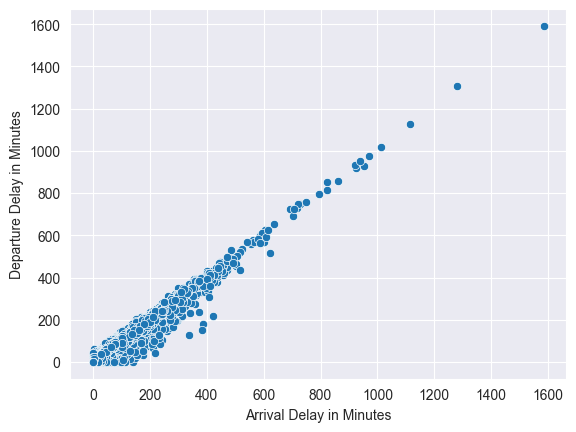

In [7]:
sns.scatterplot(data, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')

Как предполагалось, значения в факторах линейно зависят друг от друга, поэтому пропуски заменим значением из колонки отправления.

In [8]:
# замена пропусков на значение из другой колонки
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Departure Delay in Minutes']).astype(
    int)

In [9]:
# получение информации о пропусках в колонках
data.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

В остальных факторах пропусков нет.

В имеющихся данных представлено большое количество факторов-оценок различных аспектов перелёта по пятибалльной шкале (1–5 или 0, если не оценивался). Нулевые значения - это пропуски, так как они не дают никакой информации и рушат упорядоченность, что важно для модели линейной регрессии. Следовательно, их следует обработать: удалить или заменить, а для этого нужно проанализировать эти факторы.

In [10]:
# получение категориальных и численных признаков
categorical_columns = data.select_dtypes(include='object').columns
integer_columns = data.select_dtypes(exclude='object').columns

In [11]:
# получение факторов-оценок
like_categorical_integer_columns = integer_columns.drop(
    ['Age', 'satisfaction', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

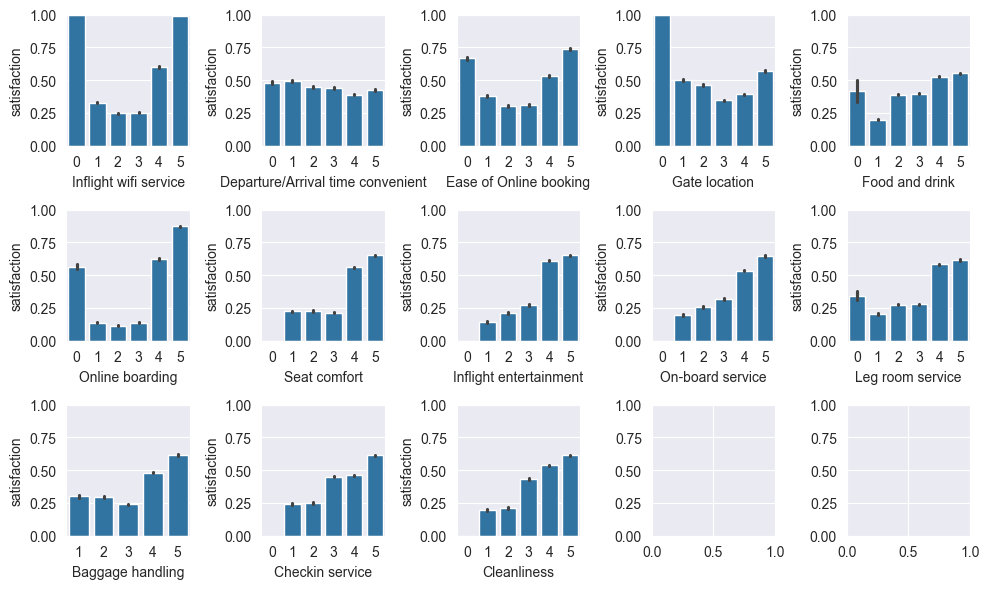

In [12]:
# распределение факторов-оценок по отношению к предсказываемой характеристике
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for ax, col in zip(axes.flat, like_categorical_integer_columns):
    bar = sns.barplot(data, x=col, y='satisfaction', ax=ax)
    bar.set_ylim(0, 1)
plt.tight_layout()

В каждом из факторов нулевые значения по-разному влияют на предсказываемый признак: в одних они отсутствуют, в других - принимают абсолютные значения (0 или 1), в третьих - имеют нормальное распределение. Рассмотрим распределение значений, например, в факторе `Inflight wifi service`, чтобы понять, как обработать пропуски.

In [13]:
# группируем по значениям 'Inflight wifi service', выводим среднее значения предсказываемого признака и количество таким строк
data.groupby('Inflight wifi service').agg({'satisfaction': 'mean', 'Age': 'count'}).rename(columns={'Age': 'count'})

,satisfaction,count
Inflight wifi service,,
0,0.997446,3916
1,0.328198,22328
2,0.247215,32320
3,0.251825,32185
4,0.600767,24775
5,0.990178,14356


Фактор принимает малое количество нулевых значений, которое можно заменить на '5', так как имеет такое среднее значение предсказываемого фактора. Но как заменить значения в оставшийся факторах? Например, в `Gate location` нулевые значения тоже принимают значение предсказываемого признака близкое к 1, но заменить на '5' не получится, так как имеют другое среднее значение. Таким образом, можно удалить пропуски, если их не большое количество.

In [14]:
# считаем строки, в которых нет нулевых значений в факторах-оценках
without_0 = (data[like_categorical_integer_columns] != 0).all(axis=1)
print(without_0.sum())

119567


Из **129 880** записей **119 567** не имеют в данных нулевые значения в факторах-оценках, что является большой частью от данных, поэтому можно удалить строки с пропусками.

In [15]:
# оставляем строки без нулевых значений в факторах-оценках
data = data[without_0]

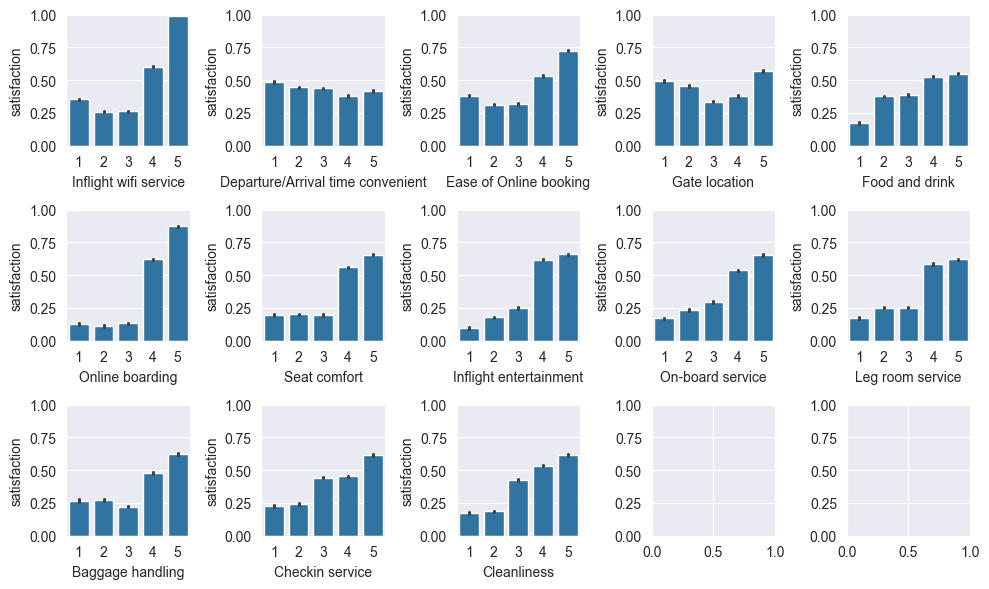

In [16]:
# распределение факторов-оценок по отношению к предсказываемой характеристике#
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for ax, col in zip(axes.flat, like_categorical_integer_columns):
    bar = sns.barplot(data, x=col, y='satisfaction', ax=ax)
    bar.set_ylim(0, 1)
plt.tight_layout()

После удаления нулевых значений, распределения приняли вид линейного графика, то есть уже сейчас можно увидеть линейную зависимость предсказываемой характеристики от факторов.

<Axes: xlabel='Age', ylabel='Count'>

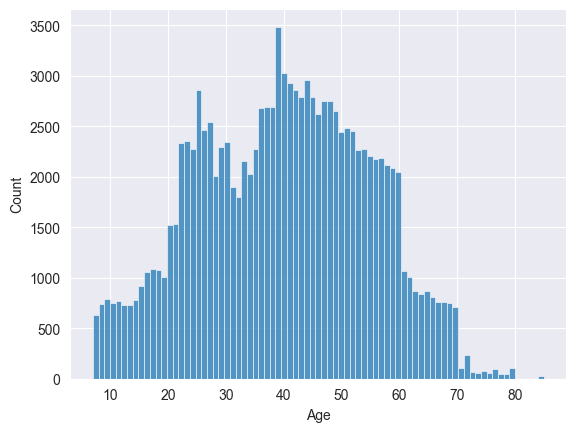

In [17]:
# распределение возраста пассажиров
sns.histplot(data['Age'], bins=79)

Возраст имеет нормально распределение, где среднее значение находится в районе 40 лет

<Axes: xlabel='Flight Distance', ylabel='Count'>

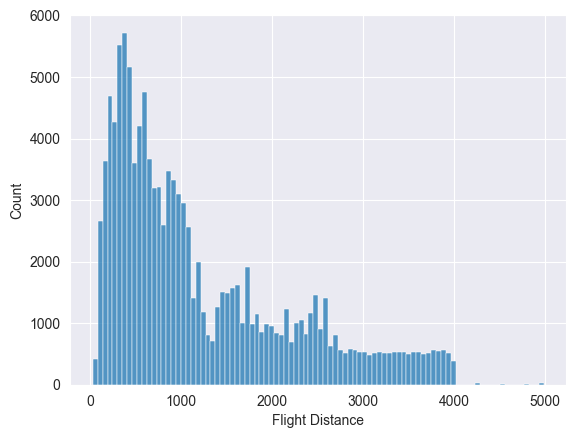

In [18]:
# распределение длины палёта
sns.histplot(data['Flight Distance'])

Есть небольшое количество полётов с длиной более 4000, что не является выбросами, так как такие большие перелёты возможны. Большая часть полётов имеет длину в районе 500, что является нормальным распределением.

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

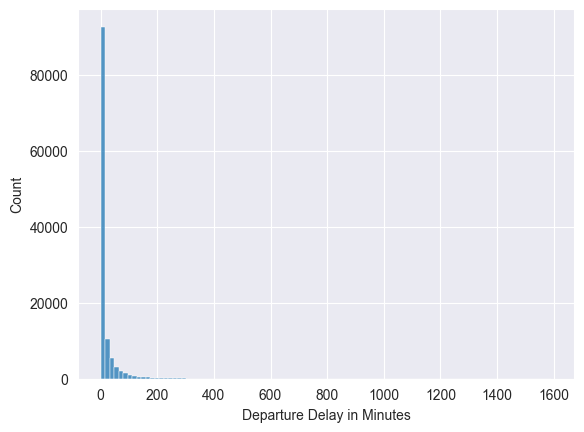

In [19]:
# распределение задержки отправления самолёта
sns.histplot(data['Departure Delay in Minutes'], bins=100)

Большая часть полётов не имеет задержки отправления, что является обычным явлением в жизни. Имеются огромные значения (более 1000), что тоже нормально, так как иногда рейсы переносятся на сутки или больше.

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

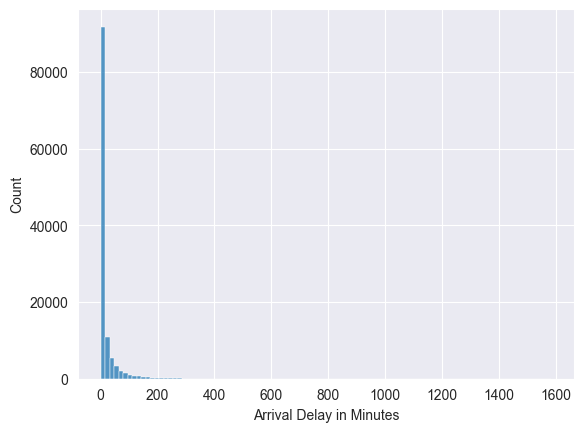

In [20]:
# распределение задержки прибытия самолёта
sns.histplot(data['Arrival Delay in Minutes'], bins=100)

Действительно, так как задержка прибытия и отправления линейно зависят, то рафик распределения отправления несильно отличается от уже графика отправления.

In [21]:
# распределение предсказываемого признака (удовлетворённость полётом)
data.groupby('satisfaction', as_index=False)['Gender'].count()

,satisfaction,Gender
0,False,68537
1,True,51030


После всех преобразований распределение предсказываемой характеристики не изменилось: у модели достаточно данных для обучения на оба класса.

# Разделение на тестовую и обучающие выборки

Перед началом решения задачи необходимо разделить имеющиеся данные на обучающую и тестовую выборки. Тестовую выборку нужно отложить до момента итоговой оценки качества полученной модели. А для дальнейших исследований и непосредственно обучения модели — использовать обучающую выборку.

In [22]:
# удаляем из данных колонку с предсказываемым признаков и создаём отдельную переменную с ней
X = data.drop(columns='satisfaction')
y = data['satisfaction']

In [23]:
from sklearn.model_selection import train_test_split

# деление на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Отбор факторов

In [24]:
# копируем таблицу с факторами и добавляем колонку с предсказываемой характеристикой
X_y_data = X_train.copy(deep=True)
X_y_data['y'] = y_train

In [25]:
# счёт таблицы корреляции численных факторов
corr = data[integer_columns].corr()

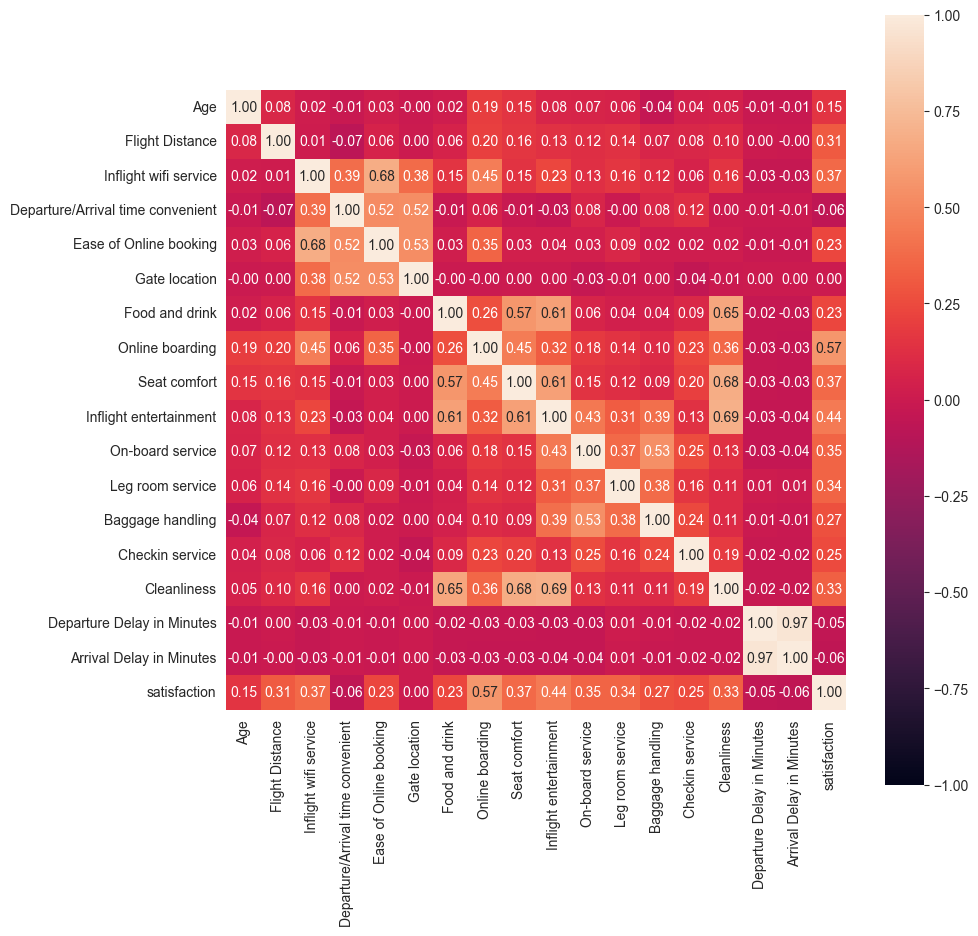

In [26]:
# вывод таблицы корреляции
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

Во-первых, большинство численных факторов линейно коррелируют с предсказываемым признаком, поэтому выбор модели падает на логистическую регрессию. Не будем использовать для обучения модели не коррелирующие признаки: `Departure/Arrival time convenient`, `Gate location`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`.

Во-вторых, некоторые признаки имеют зависимость между собой, что может испортить интерпритируемость модели. Например, `Arrival Delay in Minutes` и `Departure Delay in Minutes` имеют огромный коэффициент корреляции - один из признаков точно нужно убрать (они не умеют линейной зависимости с предсказываемой характеристикой, поэтому и так не будут использоваться для обучения). Ещё `Food and drink` и `Cleanliness` умеренно зависят от других признаков, но так как они влияют на предсказываемое значение и в этом решение интерпритируемость - не главная задача, то эти признаки лучше стоить взять для обучения модели.

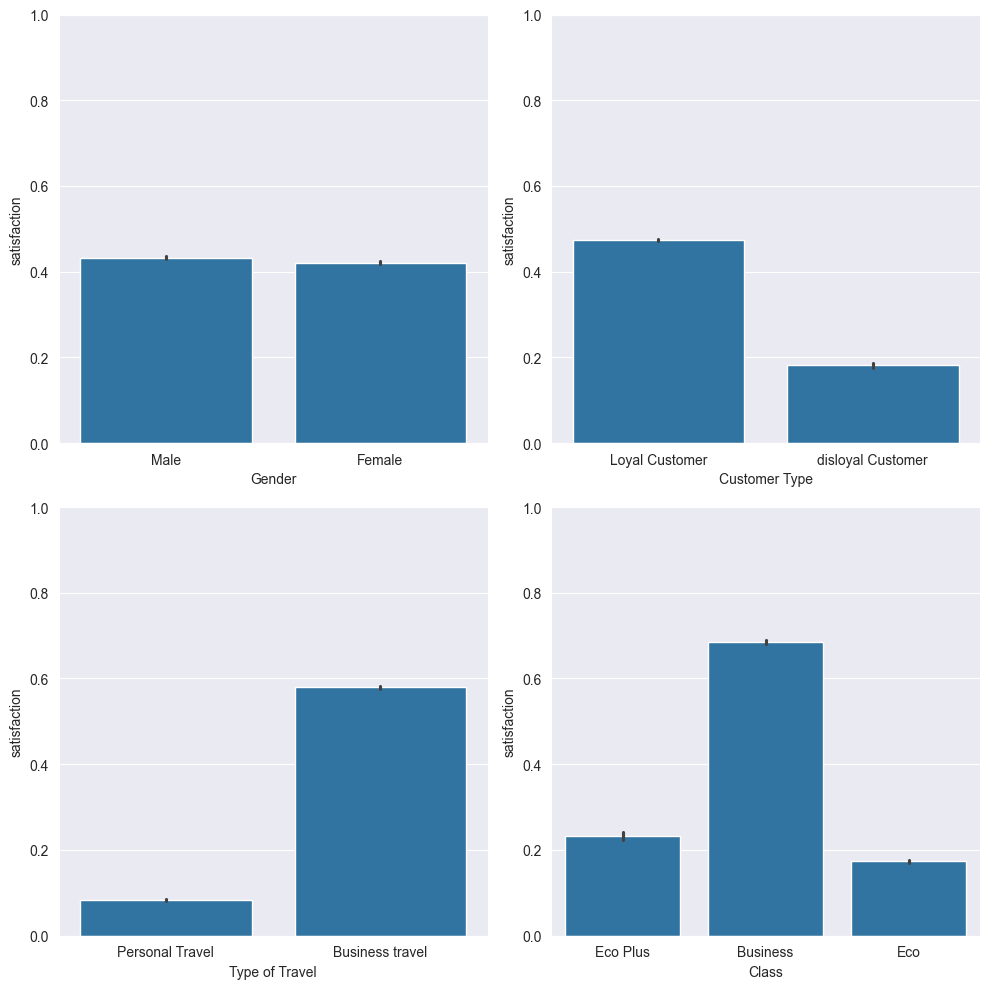

In [27]:
# строим графики среднего предсказываемого признака от значений категориальных признаков
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, col in zip(axes.flat, categorical_columns):
    bar = sns.barplot(data, x=col, y='satisfaction', ax=ax)
    bar.set_ylim(0, 1)
plt.tight_layout()

Анализируя категориальные признаки, заметно, что факторы `Customer Type`, `Type of Travel` и `Class` от значения могут влиять на предсказываемое значение, так как имеют разное среднее предсказываемого признака, поэтому их следует использовать в обучении модели.

In [28]:
# задаём переменные с названиями колонок факторов, которые будем использовать для обучения модели
numeric_factors_to_use = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
                  'Food and drink', 'Online boarding', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Cleanliness']
categorical_factors_to_use = ['Customer Type', 'Type of Travel', 'Class']

# Преобразование факторов

In [33]:
X_train_encoded = X_y_data.copy(deep=True)[numeric_factors_to_use]

In [34]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names=True)
encoder.fit(X_y_data[categorical_factors_to_use])

OneHotEncoder(cols=['Customer Type', 'Type of Travel', 'Class'],
              use_cat_names=True)

In [35]:
categorical_encoded = encoder.transform(X_y_data[categorical_factors_to_use])
categorical_factors_encoded = categorical_encoded.columns

In [36]:
X_train_encoded = pd.concat([X_train_encoded, categorical_encoded], axis=1)

In [38]:
X_train_encoded.head(5)

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
50850,42,2632,2,2,4,4,4,5,5,4,5,4,3,1,0,1,0,1,0,0
4378,46,846,2,2,2,2,1,4,4,2,4,3,4,1,0,0,1,0,1,0
8131,25,762,3,3,1,3,1,1,2,2,2,3,1,1,0,0,1,0,1,0
12698,29,164,2,2,1,2,1,1,3,2,4,4,1,1,0,0,1,0,1,0
100951,25,2009,3,5,3,3,3,3,5,5,3,5,3,1,0,1,0,1,0,0


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_encoded)

StandardScaler()

In [40]:
X_train_encoded = scaler.transform(X_train_encoded)